# Visualize the airway tree

In [1]:
import numpy as np
import os

In [2]:
files_list = os.listdir('./')
files_list

['Airway_segment_slice296.png',
 '__init__.py',
 'visualize.py',
 'predict_cuboid.npy',
 'figures',
 'tensorboard',
 '.ipynb_checkpoints',
 'download.png',
 'label_cuboid.npy',
 'Visualize_airway_tree.ipynb',
 'raw_image_cuboid.npy']

In [3]:
label_cuboid_npy_file_path = "./label_cuboid.npy"
predict_cuboid_npy_file_path = "./predict_cuboid.npy"
raw_image_cuboid_npy_file_path = "./raw_image_cuboid.npy"

label_cuboid_npy = np.load(label_cuboid_npy_file_path)
predict_cuboid_npy = np.load(predict_cuboid_npy_file_path)
raw_image_cuboid_npy = np.load(raw_image_cuboid_npy_file_path)

In [4]:
print(label_cuboid_npy.shape, predict_cuboid_npy.shape, raw_image_cuboid_npy.shape)
print(type(label_cuboid_npy), type(predict_cuboid_npy), type(raw_image_cuboid_npy))

(593, 258, 348) (593, 258, 348) (593, 258, 348)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [5]:
label_cuboid_npy = label_cuboid_npy

In [6]:
predict_cuboid_npy = predict_cuboid_npy

In [7]:
raw_image_cuboid_npy

array([[[  0.,   0.,   0., ...,   1.,   2.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  4.,   5.,   2., ...,  28.,   6.,   9.],
        [  4.,   6.,   1., ...,  11.,   2.,   0.],
        [ 11.,   8.,   2., ...,  19.,  27.,  23.]],

       [[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  4.,   0.,   0., ...,   0.,   0.,   0.],
        [  5.,   4.,   0., ...,   0.,   0.,   0.],
        ...,
        [  8.,  12.,  14., ...,  27.,  17.,  15.],
        [  9.,  10.,  10., ...,   9.,  14.,  18.],
        [  3.,   0.,   0., ...,  19.,  23.,  21.]],

       [[  0.,   0.,   1., ...,   0.,   0.,   2.],
        [  2.,   0.,   0., ...,   0.,   0.,   5.],
        [  7.,   2.,   0., ...,   0.,   0.,   3.],
        ...,
        [  2.,   8.,  10., ...,  20.,   0.,   3.],
        [ 11.,  14.,  11., ...,   3.,   0.,   8.],
        [  2.,   1.,   0., ...,  21.,  16.,  19.]],

       ...,

       [[  4.,   0.,   0

## Display the front view of these cuboids

In [8]:
from matplotlib import pyplot as plt

In [9]:
label_cuboid_front_view = np.sum(label_cuboid_npy, axis=1)
print(label_cuboid_front_view.shape)

predict_cuboid_front_view = np.sum(predict_cuboid_npy, axis=1)
print(predict_cuboid_front_view.shape)

(593, 348)
(593, 348)


In [10]:
label_cuboid_front_view = np.flipud(label_cuboid_front_view)
predict_cuboid_front_view = np.flipud(predict_cuboid_front_view)

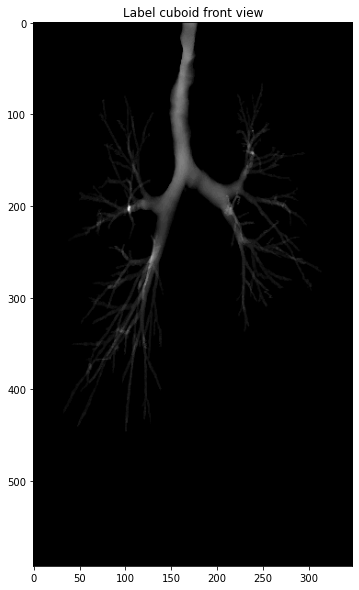

In [11]:
plt.figure(figsize=(10, 10))
plt.title("Label cuboid front view")
plt.imshow(label_cuboid_front_view, cmap='gray')

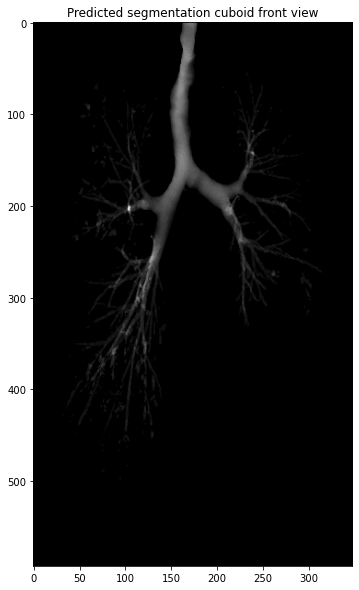

In [12]:
plt.figure(figsize=(10, 10))
plt.title("Predicted segmentation cuboid front view")
plt.imshow(predict_cuboid_front_view, cmap='gray')

(593, 348)


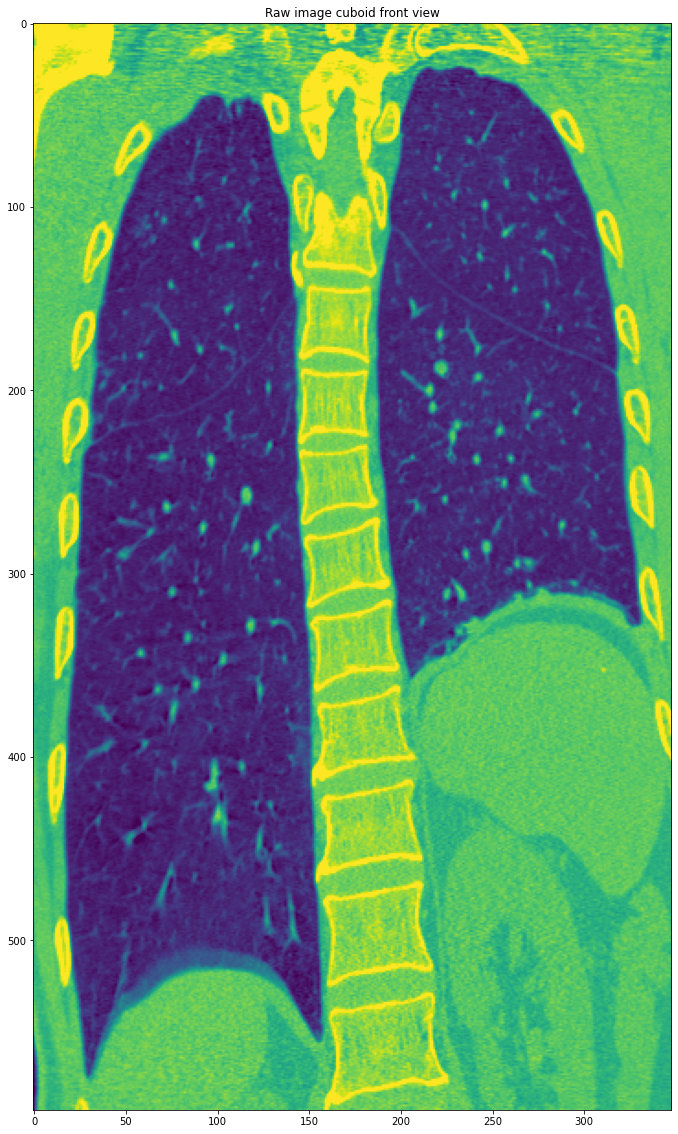

In [13]:
shape = raw_image_cuboid_npy.shape
raw_image_cuboid_front_view = raw_image_cuboid_npy[:, shape[1] * 3 // 4, :]
raw_image_cuboid_front_view = np.flipud(raw_image_cuboid_front_view)
print(raw_image_cuboid_front_view.shape)

plt.figure(figsize=(20, 20))
plt.title("Raw image cuboid front view")

plt.imshow(raw_image_cuboid_front_view)

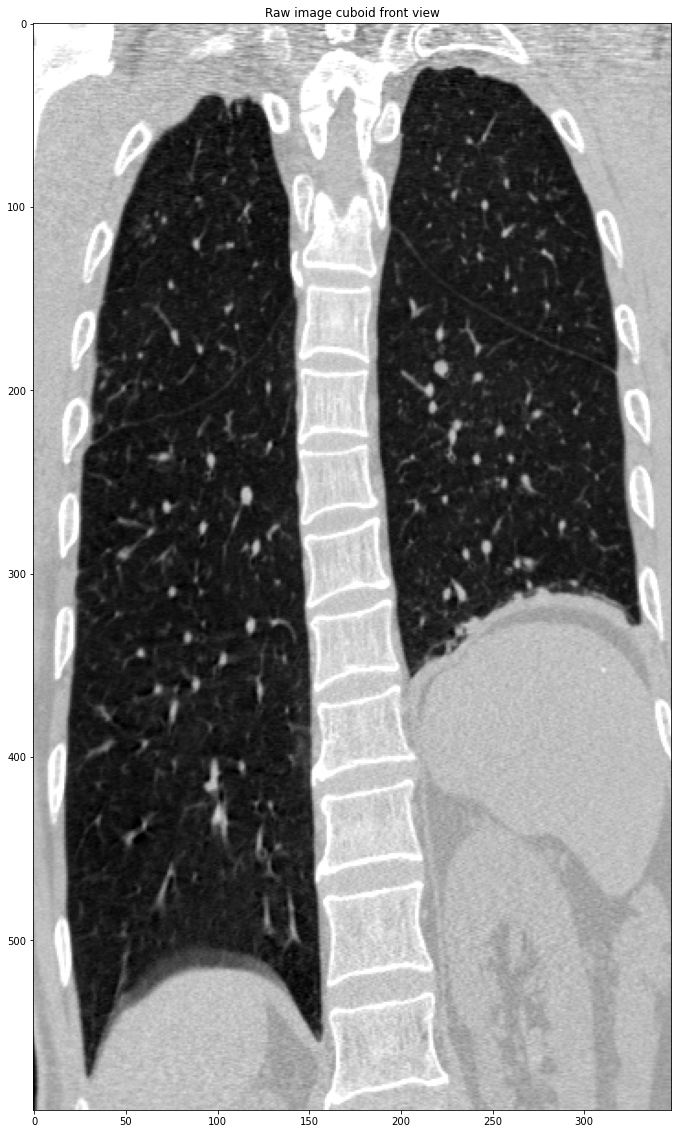

In [14]:
plt.figure(figsize=(20, 20))
plt.title("Raw image cuboid front view")

plt.imshow(raw_image_cuboid_front_view, cmap='gray')

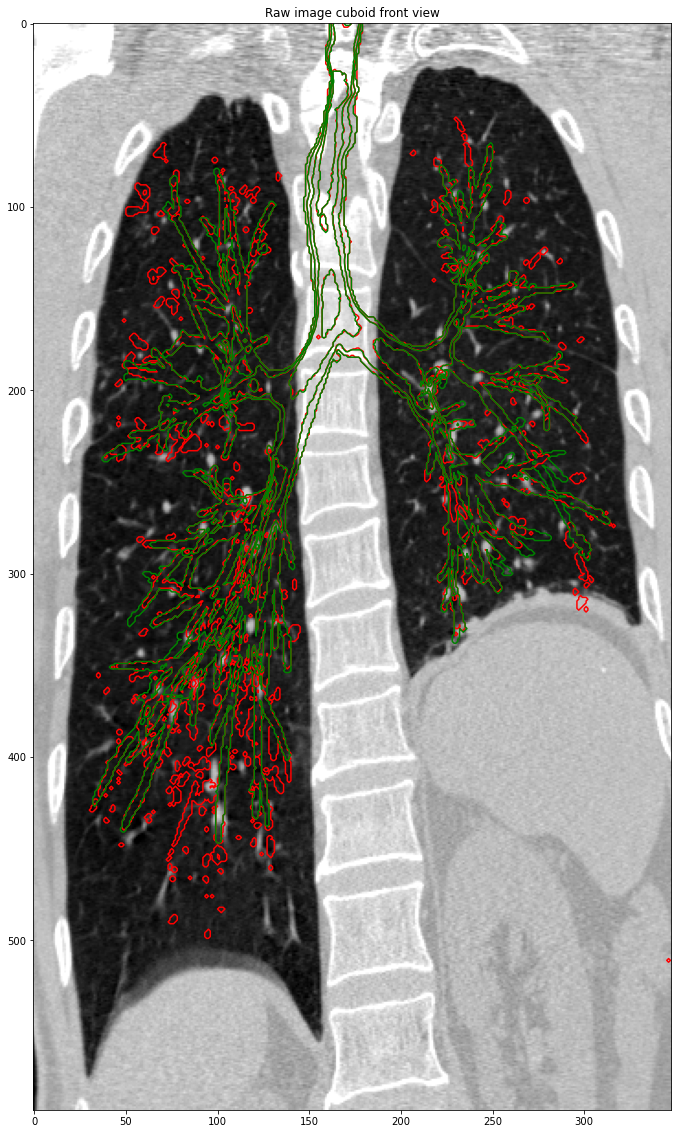

In [15]:
plt.figure(figsize=(20, 20))
plt.title("Raw image cuboid front view")

plt.imshow(raw_image_cuboid_front_view, cmap='gray')
plt.contour(predict_cuboid_front_view, colors='r')
plt.contour(label_cuboid_front_view, colors='g')

# Select one slice to visualize the raw image slice, overlapping label and segmentation with different colors.

In [16]:
depth, height, width = raw_image_cuboid_npy.shape
print([depth, height, width])

[593, 258, 348]


In [17]:
slice_index = depth // 2

raw_image_slice = raw_image_cuboid_npy[slice_index, :, :]

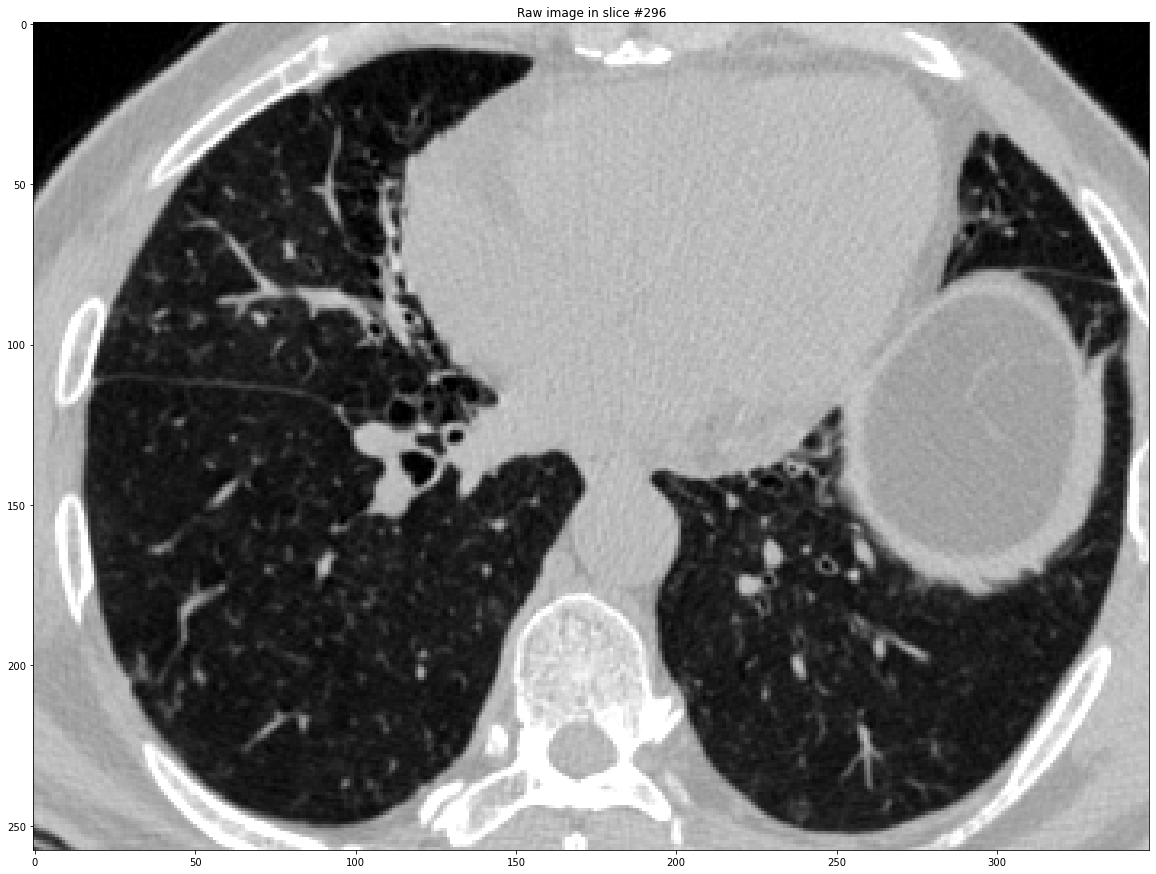

In [18]:
plt.figure(figsize=(20, 20))
plt.title("Raw image in slice #{0}".format(slice_index))
plt.imshow(raw_image_slice, cmap='gray')

In [19]:
label_slice = label_cuboid_npy[slice_index, :, :]
segment_slice = predict_cuboid_npy[slice_index, :, :]

print(label_slice.shape, segment_slice.shape)

(258, 348) (258, 348)


In [20]:
label_slice

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

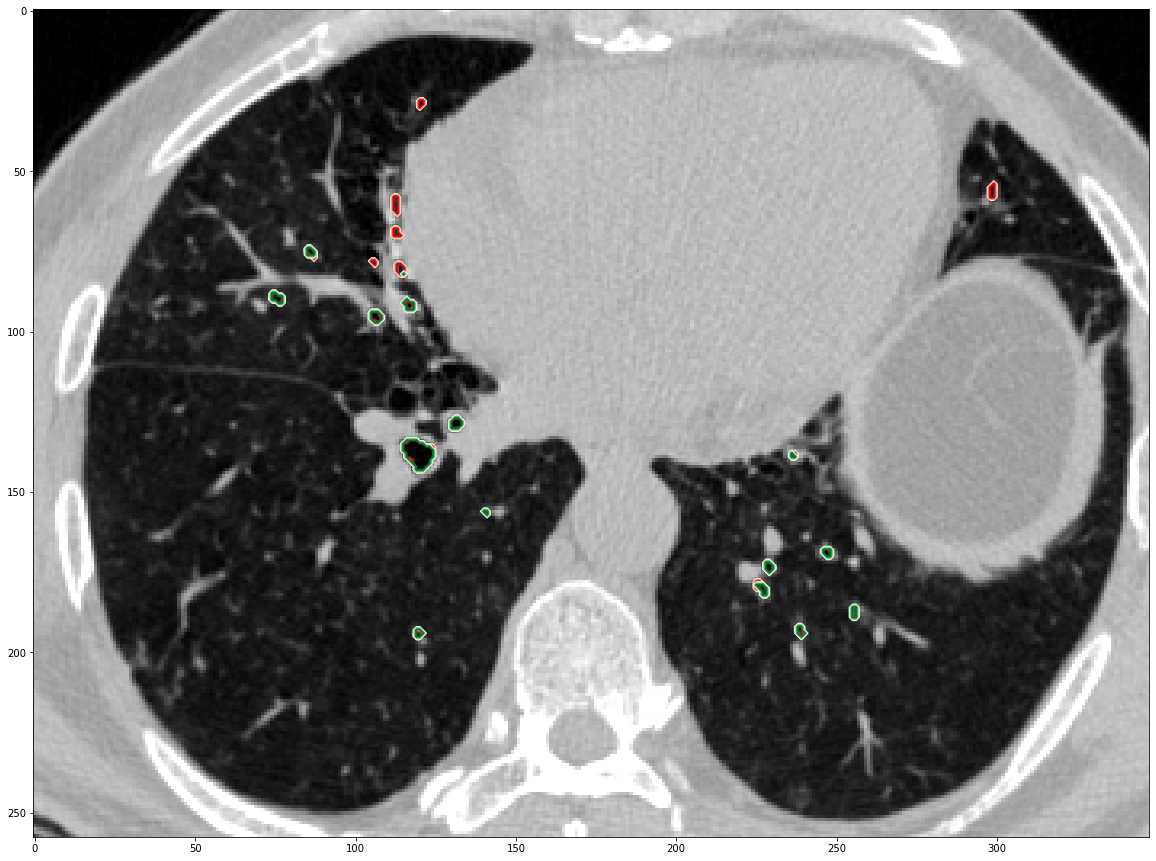

In [21]:
fig = plt.figure(figsize=(20, 20))

plt.imshow(raw_image_slice, cmap='gray')
segment_fig = plt.contour(segment_slice, cmap='Reds')
groundtruth_fig = plt.contour(label_slice, cmap="Greens")

plt.savefig('Airway_segment_slice{0}.png'.format(slice_index))

In [22]:
img_slice = plt.imread('Airway_segment_slice{0}.png'.format(slice_index))

print(img_slice.shape)
print(type(img_slice))

(1440, 1440, 4)
<class 'numpy.ndarray'>
